In [171]:
# Imports of all packages used trough out this tutorial
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import rv_discrete

# Matrix Factorisation

In [168]:
# Create a Low rank matrix
N = 10
M = 10
K = 2

U = np.random.randn(N,K)
V = np.random.randn(M,K)
Y = np.dot(U,V.T)

In [161]:
# Define The Loss function and Gradient Functions
def matrix_square_loss(U,V,Y):
    return np.sum((np.dot(U,V.T) - Y)**2)

def grad_u(U,V,Y,i,j):
    return 2*(np.dot(U[i,:],V[j,:]) - Y[i,j])*U[i,:]

def grad_v(U,V,Y,i,j):
    return 2*(np.dot(U[i,:],V[j,:]) - Y[i,j])*V[j,:]


def sgd_update(U,V,Y,mu,i,j):
    u_new = U[i,:].copy() - mu*grad_u(U,V,Y,i,j)
    v_new = V[j,:].copy() - mu*grad_v(U,V,Y,i,j)
    return u_new,v_new


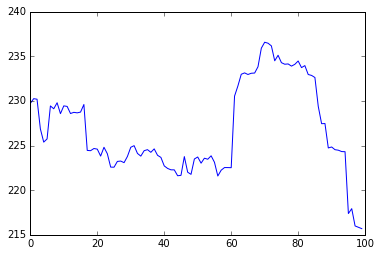

In [169]:

Q = np.random.randn(N,K)
P = np.random.randn(M,K)

mu = 0.01

losses = np.zeros(100)

for i in range(100):
    n,m = np.random.randint(N), np.random.randint(M)
    Q[n,:],P[m,:] = sgd_update(Q,P,Y,mu,n,m)
    losses[i] = matrix_square_loss(Q,P,Y)
    
plt.plot(losses)
    


In [144]:
matrix_square_loss(Q,P,Y)

423.68063285816442

In [185]:
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    errors = np.zeros(steps)
    N = np.shape(R)[0]
    M = np.shape(R)[1]
    
    for step in range(steps):
        i,j = np.random.randint(N),np.random.randint(N)
        E_ij = np.dot(P[i,:],Q[j,:]) - R[i,j]
        
    
    
    
    
    return P, Q, errors

In [187]:
N,M,errors = matrix_factorization(Y, Q, P, 2, steps=5000, alpha=0.0002, beta=0.0)

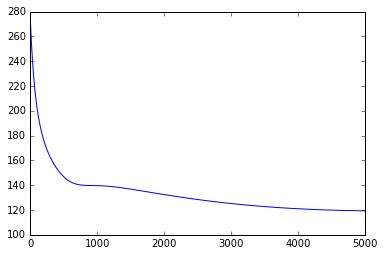

In [189]:
plt.plot(errors)

In [190]:
matrix_square_loss(N,M,Y)

119.3192200748111

In [ ]:
tau_1 = np.zeros(N)
tau_2 = np.zeros(M)

U_awsgd = np.random.randn(N,K)
V_awsgd = np.random.randn(M,K)

U_sgd = np.random.randn(N,K)
V_sgd = np.random.randn(M,K)



num_iter = 500

losses_awsgd = np.zeros(num_iter)
losses_sgd = np.zeros(num_iter)

for i in range(num_iter):
    samp_row = create_dist(tau_1)
    samp_col = create_dist(tau_2)
    rate = 1.0/(N/2.0 + i)
    losses_awsgd[i] = matrix_square_loss(U_awsgd,V_awsgd,Y)
    n,m = samp_row.rvs(), samp_col.rvs()
    U_awsgd[n,:], V_awsgd[m,:], tau_1, tau_2 = AW_sgd_update(U_awsgd,V_awsgd,Y,n,m,0.001,
                                                             samp_row,samp_col,0.0,tau_1,tau_2)
    
    p,r = np.random.randint(N), np.random.randint(N)
    
    U_sgd[p,:],V_sgd[r,:] = sgd_update(U_sgd,V_sgd,Y,p,r,0.001)
    losses_sgd[i] = matrix_square_loss(U_sgd,V_sgd,Y)

    

plt.plot(losses_awsgd,c ='red')    
plt.hold
plt.plot(losses_sgd,c = 'blue')

